In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import scipy as sc
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [17]:
df.shape

(21, 2)

In [18]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [20]:
df = df.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis = 1)
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


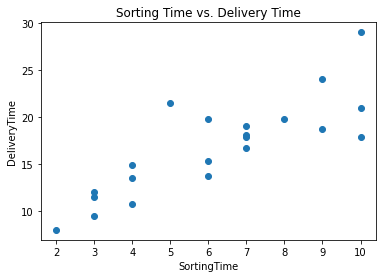

In [21]:
# Visualize data

plt.scatter(df.Sorting_Time, df.Delivery_Time)
plt.title('Sorting Time vs. Delivery Time')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')
plt.show()

In [22]:
# From scatter plot relationship between two variables does appear to be linear

<AxesSubplot:>

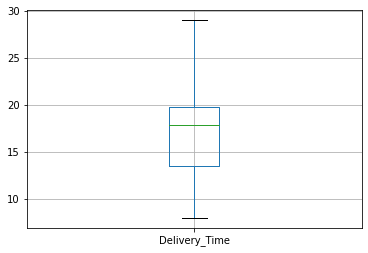

In [23]:
df.boxplot(column = ['Delivery_Time'])

In [24]:
# Perform simple linear regression

In [25]:
# Define response variable

y = df['Delivery_Time']

In [26]:
# Define explanatory variable

x = df['Sorting_Time']

In [27]:
# Add constant to predictor variables

x = sm.add_constant(x)

In [28]:
# Fit linear regression model

model = sm.OLS(y, x).fit()

In [30]:
# View model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        20:24:39   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# From the model summary we can see that fitted regression equation is:
# Delivery Time = 6.5827 + 1.6490 * Sorting Time

# Each additional hour for sorting is associated with an average increase in delivery time of 1.6490 points.
# Intercept value of 6.5827 tells an average expected delivery time for zero hour of sorting time.

In [32]:
# Model Summary

# pvalue is signifiacantaly less than 0.05. Hence there is statistically significant association between delivery time and sorting time
# 68.2% of the variation in delivery time can be explained by sorting time
# The F-Statistics (40.80) and pvalue (3.98e-06) states overall significance of regression model. Since pvalue is less than 0.05, model is statistically significant

In [33]:
# Residual vs Fitted Values plot

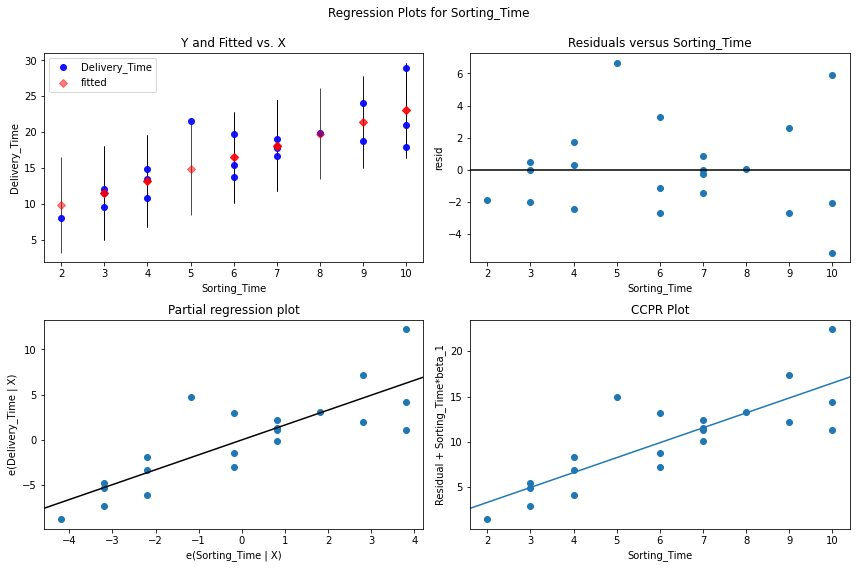

In [34]:
# Define figure size

fig = plt.figure(figsize=(12,8))

# Produce residual plots

fig = sm.graphics.plot_regress_exog(model, 'Sorting_Time', fig=fig)

In [35]:
# Since the residuals appear to be randomly scattered around zero, this is an indication that heteroscedasticity is not a problem with the explanatory variable

In [36]:
# Q-Q Plot

In [37]:
# Define residuals

res = model.resid

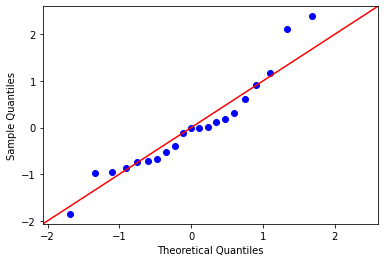

In [38]:
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

In [39]:
# The residuals stray from the 45-degree line a bit, but not enough to cause serious concern. We can assume that the normality assumption is met

# Since the residuals are normally distributed and homoscedastic, we’ve verified that the assumptions of the simple linear regression model are met. 
# Thus, the output from our model is reliable.

In [40]:
# Model Prediction

# Model prediction for sorting time 10
Delivery_Time = 6.5827 + 1.6490 * (10) 
Delivery_Time

23.0727